# Finding News articles related to lockdowns due to Corona Pandemic

In [231]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='29797838d37f4754a0dabf5da61d44d4')

articles = list()

# We are greedy, take every news we can get until we reach the limit
for n in range(1,10):
    try:
        headlines = newsapi.get_everything(q='lockdown AND Italy AND imposed',language='en',from_param='2020-02-21',page=n)
        articles = articles + headlines['articles']
    except: # We reached the page limit of our account
        break

In [232]:
import pandas as pd
df = pd.DataFrame(articles)
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [233]:
test = df.resample('D', on='publishedAt').count()

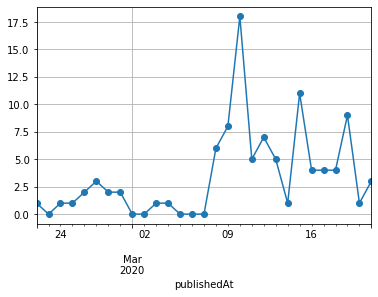

In [234]:
test['source'].plot(grid=True,marker='o')

In [235]:
test['source'].max()/test['source'].std()

4.416157408481528

In [236]:
from datetime import datetime, timedelta 

In [237]:
mask = (df['publishedAt'] >= test['source'].argmax()) & (df['publishedAt'] < test['source'].argmax() + timedelta(days = 1))
pd.set_option('display.max_colwidth', 2000)
df['source'] = df['source'].apply(lambda r : r['name'])
df[mask].drop(columns=['author','urlToImage','content'])

,source,title,description,url,publishedAt
1,CNN,This is what life is like under lockdown,Italy has imposed nationwide restrictions on 60 million residents as the number of coronavirus cases in the country continues to climb.,https://www.cnn.com/videos/world/2020/03/10/italy-lockdown-orig-london.cnn,2020-03-10 22:28:43+00:00
3,Mashable,Inside the red zone: Photos show dramatic impact of Italy's nationwide lockdown,"Approximately 60 million people in Italy are now under total lockdown in a desperate bid from the country's government to halt the spread of the new coronavirus (COVID-19). On Monday night, Prime Minister Giuseppe Conte announced severe measures for the entir…",https://mashable.com/article/italy-coronavirus-lockdown-quarantine/,2020-03-10 14:44:02+00:00
6,The Globe And Mail,All of Italy placed into lockdown after surge in COVID-19 infections and fatalities - The Globe and Mail,All of Italy placed into lockdown after surge in COVID-19 infections and fatalities The Globe and Mail Italy's PM placed the entire country on lockdown amid COVID-19 crisis - Business Insider Business Insider Italian premier locks down entire country to stop …,https://www.theglobeandmail.com/world/article-all-of-italy-placed-into-lockdown-after-surge-in-covid-19-infections/,2020-03-10 00:22:30+00:00
13,Yahoo.com,The Latest: Italy says supermarkets will remain open,Shoppers lined up overnight outside a Rome Carrefour to stock up after the government extended restrictions on movement from hard-hit northern Italy to the rest of the country. Pope Francis is urging priests to courageously go out to visit those sick from the…,https://news.yahoo.com/latest-cruise-ship-passengers-disembark-050405841.html,2020-03-10 05:04:05+00:00
14,BBC News,Coronavirus: Could the US do what Italy has done?,"Could the US lock down part, or even all, of its citizens to halt the spread of the deadly virus?",https://www.bbc.co.uk/news/world-us-canada-51804664,2020-03-10 17:01:42+00:00
16,Business Insider,Italians have been told they won't have to pay their mortgage payments while the country goes into coronavirus lockdown,"Mortgage payments will be suspended across the whole of Italy as the country struggles to deal with the coronavirus outbreak. Italy's coronavirus death toll jumped from 366 to 463 on Monday, making it the worst-hit country after China. The Italian government …",https://www.businessinsider.com/coronavirus-covid-19-italy-mortgage-payments-suspended-during-lockdown-2020-3,2020-03-10 12:30:00+00:00
18,Yahoo.com,Italy is in a nationwide lockdown over the coronavirus. Here are the rules all 60 million citizens now have to follow.,"The nationwide lockdown began Tuesday. Citizens now need police permission to travel, and businesses can open only if customers stay 3 feet apart.",https://news.yahoo.com/italy-complete-nationwide-lockdown-over-120135831.html,2020-03-10 12:01:35+00:00
25,Time,Why Is Italy’s Coronavirus Outbreak So Bad?,"In less than a month, Italy has gone from having only three cases of the coronavirus to having the highest number of cases and deaths outside of China",https://time.com/5799586/italy-coronavirus-outbreak/,2020-03-10 18:18:29+00:00
31,Time,China’s President Xi Jinping Makes First Visit to Coronavirus-Ravaged Wuhan,"State media reported Xi arrived in the morning in Wuhan, which has been under lockdown along with several nearby cities since late January",https://time.com/5799975/xi-jinping-wuhan-coronavirus/,2020-03-10 04:11:02+00:00
49,Indianexpress.com,Explained: Why Italy has imposed a nationwide lockdown,"Italy has enacted measures to clamp down movement and close public spaces. Quarantine measures that were already implemented in the northern Lombardy region, the country's richest, as well as in parts of neighbouring provinces, have now been expanded to the w…",https://indianexpress.com/article/explained/italy-coronavirus-cases-lockdown-6308192/,2020-03-10 13:41:31+00:00
